# music analysis project

<b>Imports<b>

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, LassoCV,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, f1_score, auc

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import seaborn as sns

<b>Functions<b>

In [2]:
def correlation_matrix(df, matplotlib):

    background_color = "#f6f5f5"
    plt.figure(figsize=(12,10), facecolor=background_color)
    
    colors = ["#2f5586", "#f6f5f5","#2f5586"]
    colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)
    
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(df, dtype=bool))
    ax = sns.heatmap(df, annot=True, mask=mask, cmap=colormap, cbar_kws={"shrink": .5})
    ax.set_facecolor(background_color)
    plt.show() 

In [3]:
def mape_vectorized_v2(y_true, prediction): 
    #solution to problem of division by 0
    mask = y_true != 0
    return (np.fabs(y_true - prediction)/y_true)[mask].mean()*100 

In [4]:
def show_regresion_error(predictions, true_values):
    df_predict = pd.DataFrame(predictions, true_values)
    df_predict = df_predict.reset_index(level=0, inplace=False)
    df_predict.columns = ['true_value', 'predictions']
    
    print("Mean squared error (test): %.3f" % mean_squared_error(true_values, predictions, squared=False))
    print("Mean absolute error (test): %.3f" %mean_absolute_error(true_values, predictions ))
    print("Mean absolute percentage error: %.3f" %mape_vectorized_v2(true_values, predictions))
    print("R2_score: %.3f" %r2_score(true_values, predictions))
    
    sns.scatterplot(data=df_predict, y='predictions', x='true_value')
    sns.lineplot(data=df_predict, x='true_value', y='true_value', color='g')

In [5]:
pd.set_option("display.max_columns", None)

In [6]:
df = pd.read_csv("spotify data.csv")
df.shape

(18403, 18)

In [7]:
df.head().T

,0,1,2,3,4
artist,Studio 1,John Fahey,Reigning Sound,The Red Thread,Mac Miller
album,Studio 1,The Great Santa Barbara Oil Slick,Too Much Guitar,After the Last,Swimming
reviewauthor,Andy Battaglia,Mark Richardson,Stephen M. Deusner,Chris Dahlen,Evan Rytlewski
score,8.5,8.2,8.3,7.3,7.5
releaseyear,2009.0,2005.0,2004.0,2003.0,2018.0
reviewdate,February 18 2009,February 13 2005,August 19 2004,July 17 2003,August 3 2018
recordlabel,Studio,Water,In the Red,Badman,Warner Bros.
genre,Electronic,Folk/Country,Electronic,Rock,Rap
danceability,0.511917,0.369765,0.253943,0.4254,0.624846
energy,0.499667,0.325412,0.912857,0.433474,0.438154


<b>data handling<b>

In [8]:
df=df.dropna(axis=0, how='any')
df.shape

(16785, 18)

In [9]:
df.duplicated().sum()

1

In [10]:
df[df.duplicated()]

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
8013,Fiona Apple,When the Pawn...,Judy Berman,9.4,1999.0,March 24 2019,Sony,Rock,0.5987,0.5203,2.4,-10.0754,0.03376,0.353917,0.013064,0.24087,0.46355,127.3138


In [11]:
df=df.drop_duplicates()
df.reset_index(drop=True, inplace=True)

In [12]:
df.shape

(16784, 18)

In [13]:
df.head().T

,0,1,2,3,4
artist,Studio 1,John Fahey,Reigning Sound,The Red Thread,Mac Miller
album,Studio 1,The Great Santa Barbara Oil Slick,Too Much Guitar,After the Last,Swimming
reviewauthor,Andy Battaglia,Mark Richardson,Stephen M. Deusner,Chris Dahlen,Evan Rytlewski
score,8.5,8.2,8.3,7.3,7.5
releaseyear,2009.0,2005.0,2004.0,2003.0,2018.0
reviewdate,February 18 2009,February 13 2005,August 19 2004,July 17 2003,August 3 2018
recordlabel,Studio,Water,In the Red,Badman,Warner Bros.
genre,Electronic,Folk/Country,Electronic,Rock,Rap
danceability,0.511917,0.369765,0.253943,0.4254,0.624846
energy,0.499667,0.325412,0.912857,0.433474,0.438154


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            16784 non-null  object 
 1   album             16784 non-null  object 
 2   reviewauthor      16784 non-null  object 
 3   score             16784 non-null  float64
 4   releaseyear       16784 non-null  float64
 5   reviewdate        16784 non-null  object 
 6   recordlabel       16784 non-null  object 
 7   genre             16784 non-null  object 
 8   danceability      16784 non-null  float64
 9   energy            16784 non-null  float64
 10  key               16784 non-null  float64
 11  loudness          16784 non-null  float64
 12  speechiness       16784 non-null  float64
 13  acousticness      16784 non-null  float64
 14  instrumentalness  16784 non-null  float64
 15  liveness          16784 non-null  float64
 16  valence           16784 non-null  float6

In [15]:
preprocess_column_list = ['artist', 'album','reviewauthor']
numeric_column_list = ['danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
categoric_column_list = ['genre','releaseyear']
target_column_list = ['score']

df.columns

Index(['artist', 'album', 'reviewauthor', 'score', 'releaseyear', 'reviewdate',
       'recordlabel', 'genre', 'danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo'],
      dtype='object')

# EDA

In [16]:
def get_highly_correlated_cols(df):
    df_corr = df.corr()
    corr_pairs = df_corr.unstack()
    high_corr_pairs = corr_pairs[(corr_pairs>=0.5) & (corr_pairs < 1)]
    
    correlations = list()
    tuple_arr = list()

    high_corr_pairs
    for i, value in high_corr_pairs.items():
        correlations.append(value)
        tuple_arr.append((df.columns.get_loc(i[0]),df.columns.get_loc(i[1])))
    
    tuple_arr = tuple_arr[::2]
    correlations = correlations [::2]
    return correlations, tuple_arr

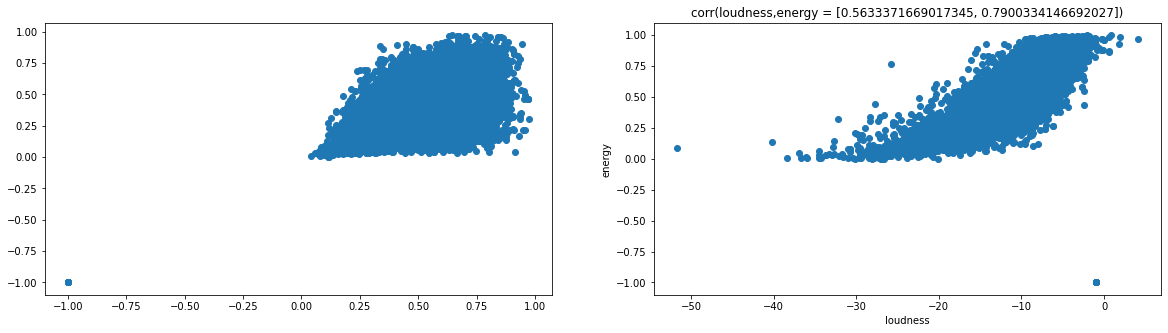

In [17]:
correlations, tuples = get_highly_correlated_cols(df)
fig, ax = plt.subplots(1,len(tuples),figsize=(20,5))
    
for i,value in enumerate(tuples):
    ax[i].scatter(df.iloc[:,[value[0],value[1]][0]],df.iloc[:,[value[0],value[1]][1]])
    plt.title("corr({},{} = {})".format(df.columns[value[0]],df.columns[value[1]],correlations))
    plt.xlabel(df.columns[value[0]])
    plt.ylabel(df.columns[value[1]])

<AxesSubplot:>

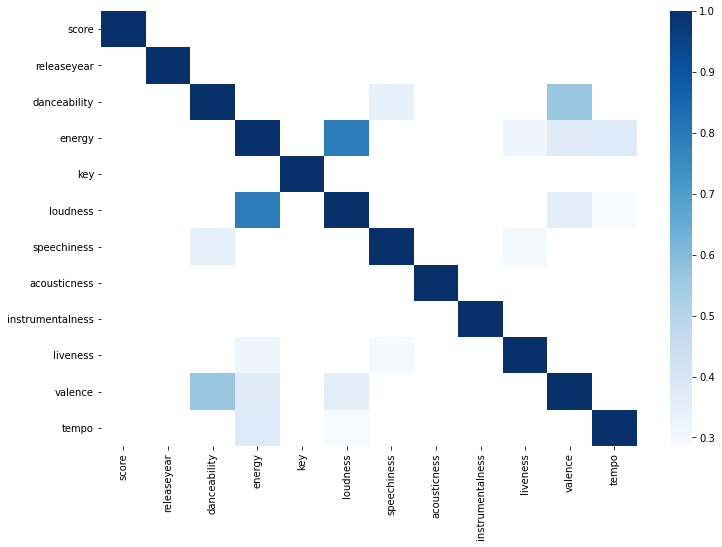

In [18]:
corr = df.corr()

kot = corr[corr>=.2]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Blues")

## <b>score</b>

<AxesSubplot:xlabel='score', ylabel='Density'>

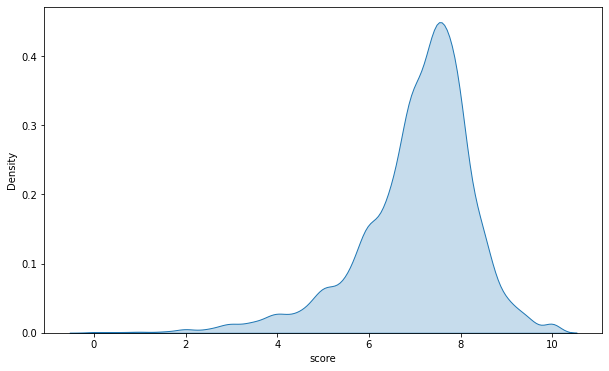

In [19]:
sns.kdeplot(df.score, shade=True)

In [20]:
df.score.describe()

count    16784.000000
mean         7.049446
std          1.248035
min          0.000000
25%          6.500000
50%          7.300000
75%          7.800000
max         10.000000
Name: score, dtype: float64

## <b>genre</b>

In [21]:
df.head()

,artist,album,reviewauthor,score,releaseyear,reviewdate,recordlabel,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,Studio 1,Studio 1,Andy Battaglia,8.5,2009.0,February 18 2009,Studio,Electronic,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167
1,John Fahey,The Great Santa Barbara Oil Slick,Mark Richardson,8.2,2005.0,February 13 2005,Water,Folk/Country,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647
2,Reigning Sound,Too Much Guitar,Stephen M. Deusner,8.3,2004.0,August 19 2004,In the Red,Electronic,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500
3,The Red Thread,After the Last,Chris Dahlen,7.3,2003.0,July 17 2003,Badman,Rock,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200
4,Mac Miller,Swimming,Evan Rytlewski,7.5,2018.0,August 3 2018,Warner Bros.,Rap,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308


In [22]:
df.genre.value_counts()

Rock            6722
Electronic      3573
Experimental    1647
Rap             1617
Pop/R&B         1286
Metal            754
Folk/Country     735
Jazz             278
Global           161
none              11
Name: genre, dtype: int64

Text(0.5, 1.0, 'number of songs by genre')

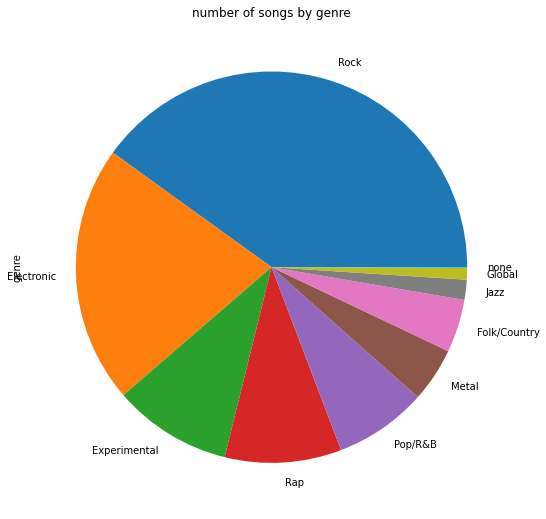

In [23]:
fig0=plt.figure(figsize=(9,9))
df['genre'].value_counts().plot(kind='pie')
plt.title("number of songs by genre")

<AxesSubplot:xlabel='genre'>

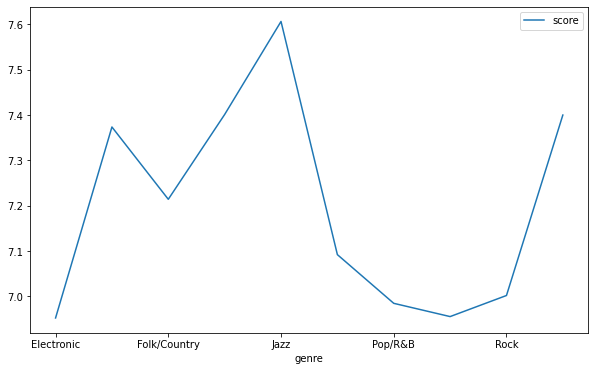

In [24]:
df1=df.groupby('genre').mean().reset_index()
df1.plot(x='genre', y='score')

<b>Distribution of score by genres<b>

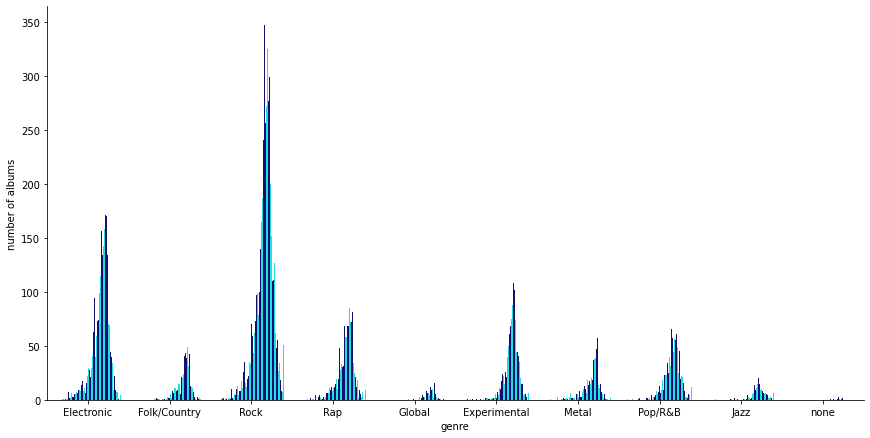

In [25]:
g = sns.catplot(
    hue='score', 
    data=df,
    kind='count', 
    x='genre',
    palette=["cyan", "navy"], 
    height=6, 
    aspect=2,
    legend=False,
    ).set_axis_labels('genre', 'number of albums')
#g.ax.legend(labels=['genre','genre'])

## artist

In [26]:
df.artist.value_counts()

Neil Young               27
Bonnie “Prince” Billy    22
Animal Collective        21
Guided by Voices         20
David Bowie              19
                         ..
Tomb Mold                 1
Magnet                    1
Captain Beefheart         1
Victory at Sea            1
Nathan Salsburg           1
Name: artist, Length: 7892, dtype: int64

In [27]:
len(df.artist.unique())

7892

## album

In [28]:
df.album.value_counts()[300:400]

Confetti        2
Radio Amor      2
Alter           2
In My Mind      2
Miniatures      2
               ..
The Big Bang    2
North           2
Algiers         2
S/T             2
Surrounded      2
Name: album, Length: 100, dtype: int64

In [29]:
len(df.album.unique())

16183

## reviewauthor

In [30]:
df.reviewauthor.value_counts()

Ian Cohen              690
Stephen M. Deusner     595
Joe Tangari            563
Stuart Berman          476
Mark Richardson        449
                      ... 
Sean Stanley             1
Marcus Moore             1
John Lingan              1
Brady Gerber             1
Mychal Denzel Smith      1
Name: reviewauthor, Length: 554, dtype: int64

In [31]:
len(df.reviewauthor.unique())

554

## releaseyear

In [32]:
df.releaseyear.value_counts()

2018.0    992
2016.0    974
2017.0    963
2015.0    940
2019.0    938
         ... 
1962.0      4
1963.0      3
1957.0      2
1960.0      2
1959.0      1
Name: releaseyear, Length: 61, dtype: int64

<AxesSubplot:>

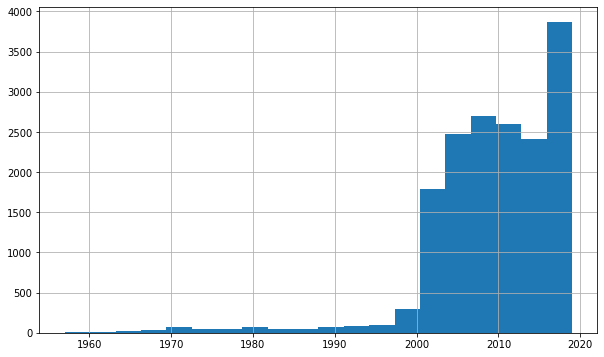

In [33]:
df['releaseyear'].hist(bins=20)

<AxesSubplot:xlabel='releaseyear'>

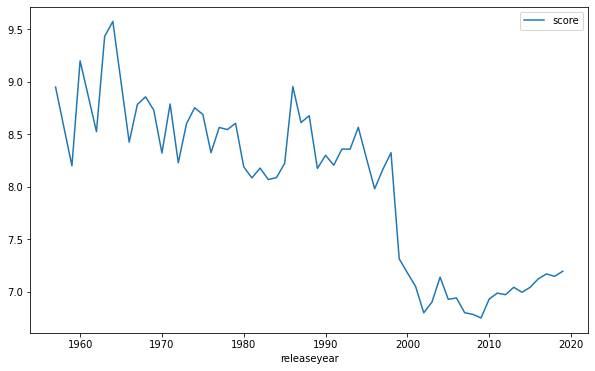

In [34]:
df1=df.groupby('releaseyear').mean().reset_index()
df1.plot(x='releaseyear', y='score')

## reviewdate

In [35]:
df.reviewdate.value_counts()

March 31 2000      11
April 30 2000       9
March 31 2001       8
May 23 2019         8
May 22 2019         8
                   ..
January 21 2001     1
August 23 2000      1
October 16 2016     1
July 1 2018         1
February 2 2007     1
Name: reviewdate, Length: 4880, dtype: int64

## recordlabel

In [36]:
df.recordlabel.value_counts()

none                         602
Self-released                333
Sub Pop                      264
Merge                        227
Domino                       212
                            ... 
Phthalo                        1
 Daydream Library Series       1
Stinky                         1
AraabMuzik Label Group         1
Stereo Vision                  1
Name: recordlabel, Length: 3034, dtype: int64

In [37]:
len(df.recordlabel.unique())

3034

## Numeric columns

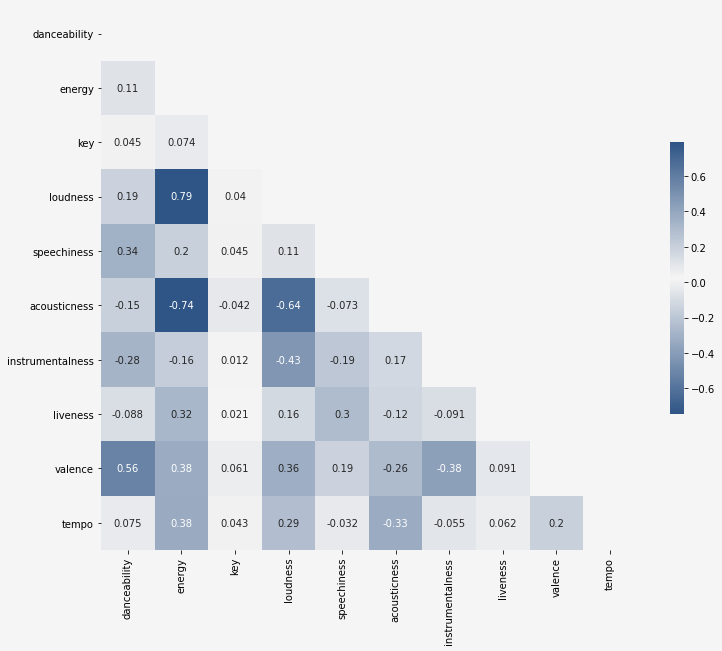

In [38]:
correlation_matrix(df[numeric_column_list].corr(), cm)

<b>score analysis against the numeric features<b>

<AxesSubplot:xlabel='loudness'>

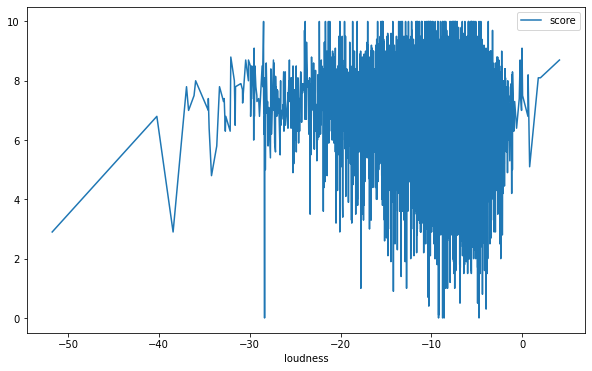

In [39]:
df1=df.groupby('loudness').mean().reset_index()
df1.plot(x='loudness', y='score')

<AxesSubplot:xlabel='tempo'>

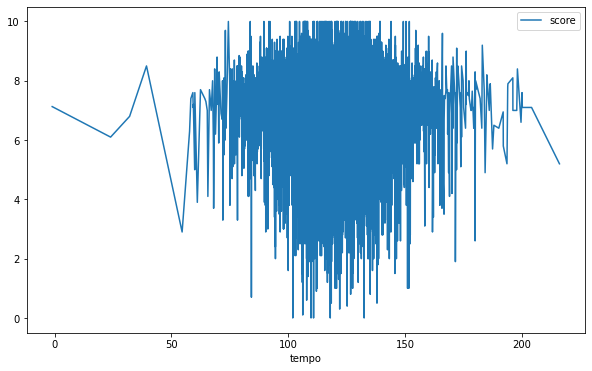

In [40]:
df1=df.groupby('tempo').mean().reset_index()
df1.plot(x='tempo', y='score')

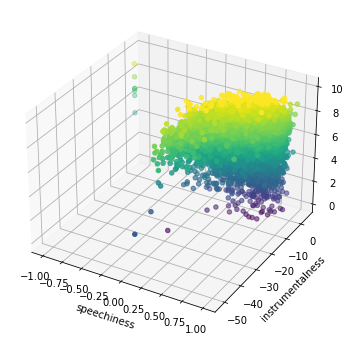

In [41]:
ax= plt.axes(projection='3d')

xdata= df.energy
ydata=df.loudness
zdata=df.score

plt.xlabel('speechiness')
plt.ylabel('instrumentalness')

ax.scatter3D(xdata,ydata,zdata,c=zdata)

# Data Processing

In [42]:
preprocess_column_list = ['artist', 'album','reviewauthor']
numeric_column_list = ['danceability', 'energy', 'key', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo']
categoric_column_list = ['genre','releaseyear']
target_column_list = ['score']

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            16784 non-null  object 
 1   album             16784 non-null  object 
 2   reviewauthor      16784 non-null  object 
 3   score             16784 non-null  float64
 4   releaseyear       16784 non-null  float64
 5   reviewdate        16784 non-null  object 
 6   recordlabel       16784 non-null  object 
 7   genre             16784 non-null  object 
 8   danceability      16784 non-null  float64
 9   energy            16784 non-null  float64
 10  key               16784 non-null  float64
 11  loudness          16784 non-null  float64
 12  speechiness       16784 non-null  float64
 13  acousticness      16784 non-null  float64
 14  instrumentalness  16784 non-null  float64
 15  liveness          16784 non-null  float64
 16  valence           16784 non-null  float6

In [44]:
df_01 = df.copy()

In [45]:
df_01.rename(columns={'releaseyear': 'years_since'}, inplace=True)
t=2022
df_01['years_since']=t-df_01['years_since']


<b>artists</b>

In [46]:
dups_artists = df_01.pivot_table(columns=['artist'], aggfunc='size')
dups_artists.shape

(7892,)

In [47]:
artists_df=pd.DataFrame({'artist':dups_artists.index, 'number_of_albums':dups_artists.values})

In [48]:
#artists_df.head()

In [49]:
df_01= df_01.join(artists_df.set_index('artist'), on='artist')

In [50]:
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16784 entries, 0 to 16783
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            16784 non-null  object 
 1   album             16784 non-null  object 
 2   reviewauthor      16784 non-null  object 
 3   score             16784 non-null  float64
 4   years_since       16784 non-null  float64
 5   reviewdate        16784 non-null  object 
 6   recordlabel       16784 non-null  object 
 7   genre             16784 non-null  object 
 8   danceability      16784 non-null  float64
 9   energy            16784 non-null  float64
 10  key               16784 non-null  float64
 11  loudness          16784 non-null  float64
 12  speechiness       16784 non-null  float64
 13  acousticness      16784 non-null  float64
 14  instrumentalness  16784 non-null  float64
 15  liveness          16784 non-null  float64
 16  valence           16784 non-null  float6

<b>album</b>

In [51]:
dups_album = df_01.pivot_table(columns=['album'], aggfunc='size')
album_df=pd.DataFrame({'album':dups_album.index, 'number_of_dups':dups_album.values})
df_01= df_01.join(album_df.set_index('album'), on='album')

In [52]:
df_01.number_of_dups.value_counts()

1     15742
2       738
3       132
4        52
5        35
26       26
6        24
18       18
10       10
7         7
Name: number_of_dups, dtype: int64

<b>reviewauthor</b>

In [53]:
df_01 = df_01.drop(["reviewdate","recordlabel",'artist','album','reviewauthor'], axis=1)

In [54]:
df_01.head().T

,0,1,2,3,4
score,8.5,8.2,8.3,7.3,7.5
years_since,13.0,17.0,18.0,19.0,4.0
genre,Electronic,Folk/Country,Electronic,Rock,Rap
danceability,0.511917,0.369765,0.253943,0.4254,0.624846
energy,0.499667,0.325412,0.912857,0.433474,0.438154
key,5.25,4.470588,4.428571,5.7,4.153846
loudness,-5.626583,-19.153824,-1.0895,-12.871,-9.456077
speechiness,0.031983,0.148624,0.0555,0.02826,0.170246
acousticness,0.724917,0.647053,0.000253,0.310325,0.652462
instrumentalness,0.024493,0.559133,0.751214,0.224137,0.012819


In [55]:
#creating a copy of df_01 without dummies
df_02=df_01

<b>genre</b>

In [56]:
df_01=pd.get_dummies(df_01,columns=['genre'],prefix=['genre'])
df_01.head()

,score,years_since,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups,genre_Electronic,genre_Experimental,genre_Folk/Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop/R&B,genre_Rap,genre_Rock,genre_none
0,8.5,13.0,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,1,1,1,0,0,0,0,0,0,0,0,0
1,8.2,17.0,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,4,1,0,0,1,0,0,0,0,0,0,0
2,8.3,18.0,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,4,1,1,0,0,0,0,0,0,0,0,0
3,7.3,19.0,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,1,1,0,0,0,0,0,0,0,0,1,0
4,7.5,4.0,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,5,2,0,0,0,0,0,0,0,1,0,0


# Linear models

## Regession model of score

In [57]:
df_01.head()

,score,years_since,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups,genre_Electronic,genre_Experimental,genre_Folk/Country,genre_Global,genre_Jazz,genre_Metal,genre_Pop/R&B,genre_Rap,genre_Rock,genre_none
0,8.5,13.0,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,1,1,1,0,0,0,0,0,0,0,0,0
1,8.2,17.0,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,4,1,0,0,1,0,0,0,0,0,0,0
2,8.3,18.0,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,4,1,1,0,0,0,0,0,0,0,0,0
3,7.3,19.0,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,1,1,0,0,0,0,0,0,0,0,1,0
4,7.5,4.0,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,5,2,0,0,0,0,0,0,0,1,0,0


In [58]:
y = df_01['score']
X = df_01.drop(['score'],axis=1)
y.shape, X.shape

((16784,), (16784, 23))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #16784 Number of training samples: #13427 Number of test samples: #3357


In [60]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((13427, 23), (3357, 23))

Mean squared error (test): 1.226
Mean absolute error (test): 0.904
Mean absolute percentage error: 16.846
R2_score: 0.043


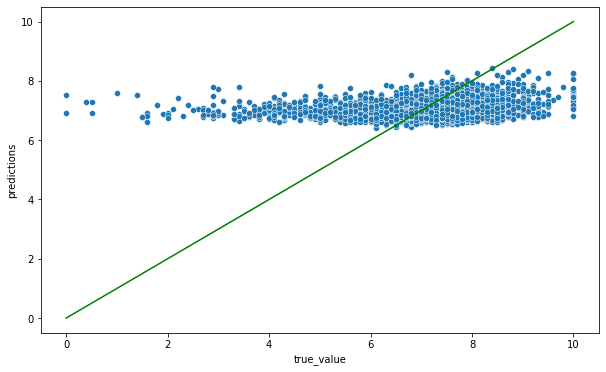

In [61]:
linear_regression = LinearRegression().fit(X_train_scaled, y_train)
predictions = linear_regression.predict(X_test_scaled)
true_values = y_test
show_regresion_error(predictions, true_values)

## Classification models

<b>genre model<b>

In [62]:
replace_map = {'none':0,'Rock':1,'Electronic':2,'Rap':3,'Pop/R&B':4,'Metal':5,'Folk/Country':6,'Jazz':7,'Global':8,'Experimental':9}
df_02.replace(replace_map, inplace=True)

In [63]:
df_02.head().T

,0,1,2,3,4
score,8.500000,8.200000,8.300000,7.300000,7.500000
years_since,13.000000,17.000000,18.000000,19.000000,4.000000
genre,2.000000,6.000000,2.000000,1.000000,3.000000
danceability,0.511917,0.369765,0.253943,0.425400,0.624846
energy,0.499667,0.325412,0.912857,0.433474,0.438154
key,5.250000,4.470588,4.428571,5.700000,4.153846
loudness,-5.626583,-19.153824,-1.089500,-12.871000,-9.456077
speechiness,0.031983,0.148624,0.055500,0.028260,0.170246
acousticness,0.724917,0.647053,0.000253,0.310325,0.652462
instrumentalness,0.024493,0.559133,0.751214,0.224137,0.012819


In [64]:
y = df_02['genre']
X = df_02.drop(['genre'],axis=1)
y.shape, X.shape

((16784,), (16784, 14))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))


Initial amount of samples: #16784 Number of training samples: #13427 Number of test samples: #3357


### Logistic Regression

In [66]:
# add hyper parameter for inbalanced classes
logistic_model = LogisticRegression(class_weight='balanced')

In [67]:
clf_model = LogisticRegression().fit(X_train, y_train)

y_pred=clf_model.predict(X_test)

In [68]:
acc=clf_model.score(X_test,y_test)

print(f"accuracy is {acc}")

accuracy is 0.41346440274054214


In [69]:
X_test

,score,years_since,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups
10155,7.0,42.0,0.320214,0.967786,6.000000,-3.212000,0.107221,0.343336,0.130231,0.229107,0.625143,136.540000,1,1
8237,7.2,19.0,0.911000,0.438000,4.000000,-7.423000,0.350000,0.533000,0.000000,0.115000,0.617000,101.000000,1,1
12563,8.8,7.0,0.684500,0.648050,5.250000,-8.403100,0.300060,0.152778,0.000263,0.255050,0.508530,104.108150,4,1
14214,6.4,13.0,0.368500,0.762800,5.600000,-6.621000,0.042720,0.108995,0.384129,0.171050,0.383580,131.300500,3,1
6872,5.8,18.0,0.726333,0.594667,3.166667,-4.923500,0.185225,0.314133,0.001306,0.174517,0.568667,114.168417,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14058,6.4,18.0,0.268000,0.471000,5.000000,-16.493000,0.137000,0.796000,0.896000,0.097500,0.133000,170.432000,6,1
3098,6.5,17.0,0.653500,0.625500,5.500000,-4.980000,0.047550,0.067750,0.000000,0.109000,0.509500,119.438000,14,1
6210,7.1,9.0,0.815500,0.868750,6.250000,-9.291000,0.144000,0.008505,0.498000,0.450750,0.450250,120.989500,3,1
14378,7.8,13.0,0.468846,0.776769,6.769231,-5.934385,0.052723,0.080584,0.044768,0.189623,0.515154,136.989231,4,1


In [70]:
predictions = clf_model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)
print(classification_report(predictions,y_test))

[[   0    2    2    0    0    0    0    0    0    0]
 [   0 1312   24    9    0    0    0    0    0    7]
 [   0  626   54    3    0    0    0    1    0   14]
 [   0  305    2    6    0    0    0    0    0    2]
 [   0  252    8    4    0    0    0    0    0    1]
 [   0  145    3    1    0    0    0    0    0    1]
 [   0  149    9    1    0    0    0    0    0    1]
 [   0   40   12    0    0    0    0    0    0    2]
 [   0   35    1    0    0    0    0    0    0    0]
 [   0  270   34    3    0    0    0    0    0   16]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.97      0.42      0.58      3136
           2       0.08      0.36      0.13       149
           3       0.02      0.22      0.04        27
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00   

<b>prediction of 'years-since'<b>

In [71]:
y = df_01['years_since']
X = df_01.drop(['years_since'],axis=1)
y.shape, X.shape

((16784,), (16784, 23))

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

Initial amount of samples: #16784 Number of training samples: #13427 Number of test samples: #3357


((13427, 23), (3357, 23))

In [73]:
logistic_model = LogisticRegression(class_weight='balanced')

In [74]:
clf_model = LogisticRegression().fit(X_train, y_train)

y_pred=clf_model.predict(X_test)

In [75]:
acc=clf_model.score(X_test,y_test)

print(f"accuracy is {acc}")

accuracy is 0.07059874888293119


In [76]:
clf_model = LogisticRegression().fit(X_train_scaled, y_train)

y_pred=clf_model.predict(X_test_scaled)

In [77]:
acc=clf_model.score(X_test_scaled,y_test)

print(f"accuracy is {acc}")

accuracy is 0.0717902889484659


# Random Forest

## model of score

In [78]:
y = df_01['score']
X = df_01.drop(['score'],axis=1)
y.shape, X.shape

((16784,), (16784, 23))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #16784 Number of training samples: #13427 Number of test samples: #3357


Mean squared error (test): 1.185
Mean absolute error (test): 0.877
Mean absolute percentage error: 16.300
R2_score: 0.105


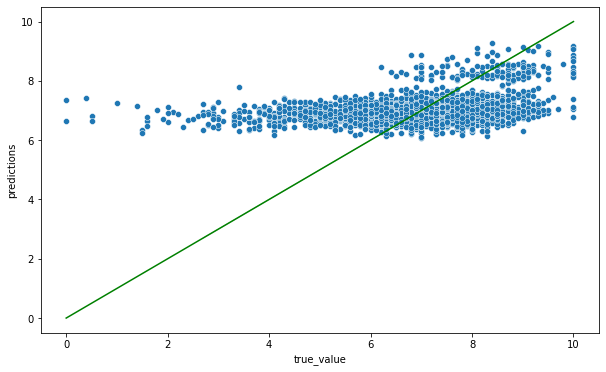

In [80]:
random_forest_regressor = RandomForestRegressor(n_estimators= 100, max_depth=10,
                                                min_samples_leaf=20).fit(X_train, y_train)
predictions = random_forest_regressor.predict(X_test)
show_regresion_error(predictions, y_test)

In [81]:
random_forest_regressor.score(X_train, y_train)

0.2160578151730601

In [82]:
random_forest_regressor.score(X_test, y_test)

0.10543600718503188

<b>converting the 'score' to discrete variables and trying again<b>

In [83]:
df_03=df_02.copy()

In [84]:
df_ds=df_02

In [85]:
df_ds['score']=pd.cut(df_ds.score, bins=10, labels=np.arange(10), right=True)

In [86]:
df_ds

,score,years_since,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups
0,8,13.0,2,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,1,1
1,8,17.0,6,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,4,1
2,8,18.0,2,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,4,1
3,7,19.0,1,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,1,1
4,7,4.0,3,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,5,3.0,3,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200,6,2
16780,5,3.0,1,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800,12,2
16781,6,3.0,3,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769,2,2
16782,7,3.0,1,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214,4,2


In [87]:
y = df_ds['score']
X = df_ds.drop(['score'],axis=1)
y.shape, X.shape

((16784,), (16784, 14))

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #16784 Number of training samples: #13427 Number of test samples: #3357


In [89]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=30,
                                 random_state=0, max_depth=8,min_samples_leaf=20)

trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data=  0.43241230356743876
Accuracy on test data=  0.4399761691986893


<b>KNN<b>

In [90]:
k = 1000
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1000)

In [91]:
y_pred=clf.predict(X_test)

print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))


[[   0    0    0    0    0    0    0    6    0    0]
 [   0    0    0    0    0    0    0   11    0    0]
 [   0    0    0    0    0    0    0   28    0    0]
 [   0    0    0    0    0    0    0   56    0    0]
 [   0    0    0    0    0    0    0  129    0    0]
 [   0    0    0    0    0    0    0  312    0    0]
 [   0    0    0    0    0    0    0  787    5    0]
 [   0    0    0    0    0    0    0 1431   14    0]
 [   0    0    0    0    0    0    0  475   27    0]
 [   0    0    0    0    0    0    0   65   11    0]]
Accuracy =  0.4343163538873995


<b>naive bayes<b>

In [92]:
nb = GaussianNB()

nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)
y_pred_train = nb.predict(X_train)

# Print results
print('Accuracy on Train data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
print('Accuracy on test data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on Train data =  0.28263945780889255
Accuracy on test data =  0.2669049746797736


<b>switching to binary score<b>

In [93]:
df_02

,score,years_since,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups
0,8,13.0,2,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,1,1
1,8,17.0,6,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,4,1
2,8,18.0,2,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,4,1
3,7,19.0,1,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,1,1
4,7,4.0,3,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,5,3.0,3,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200,6,2
16780,5,3.0,1,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800,12,2
16781,6,3.0,3,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769,2,2
16782,7,3.0,1,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214,4,2


In [94]:
df_b=df_02

In [95]:
bins = [0,7,10]
labels = [0,1]

In [96]:
df_b['score_binned'] = pd.cut(df_b['score'], bins, labels=labels)

In [97]:
df_b

,score,years_since,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups,score_binned
0,8,13.0,2,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,1,1,1
1,8,17.0,6,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,4,1,1
2,8,18.0,2,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,4,1,1
3,7,19.0,1,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,1,1,0
4,7,4.0,3,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,5,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,5,3.0,3,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200,6,2,0
16780,5,3.0,1,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800,12,2,0
16781,6,3.0,3,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769,2,2,0
16782,7,3.0,1,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214,4,2,0


In [98]:
df_b = df_b.drop(["score"], axis=1)

In [99]:
df_b.score_binned=pd.factorize( df_b.score_binned,na_sentinel=None )[0]

In [100]:
df_b.dtypes

years_since         float64
genre                 int64
danceability        float64
energy              float64
key                 float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
number_of_albums      int64
number_of_dups        int64
score_binned          int64
dtype: object

In [101]:
df_b.score_binned.value_counts()

1    14106
0     2652
2       26
Name: score_binned, dtype: int64

In [102]:
df_b = df_b[df_b.score_binned != 2]

In [103]:
df_b.score_binned.value_counts()

1    14106
0     2652
Name: score_binned, dtype: int64

In [104]:
np.any(np.isnan(df_b))

False

In [105]:
y = df_b['score_binned']
X = df_b.drop(['score_binned'],axis=1)
y.shape, X.shape

((16758,), (16758, 14))

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #16758 Number of training samples: #13406 Number of test samples: #3352


In [107]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=300,
                                 random_state=0, max_depth=10,min_samples_leaf=20)

trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data =  0.8610323735640758
Accuracy on test data =  0.8615751789976134


In [108]:
test_list=['years_since','genre','danceability','energy','key','loudness','speechiness',
 'acousticness','instrumentalness','liveness','valence',
 'tempo','number_of_albums','number_of_dups']


In [109]:
featuresDF=pd.DataFrame({"features":test_list,"weights":trained_forest.feature_importances_})
featuresDF.sort_values("weights",ascending=False)

,features,weights
0,years_since,0.417962
12,number_of_albums,0.134083
5,loudness,0.048798
2,danceability,0.048517
10,valence,0.048475
8,instrumentalness,0.043652
6,speechiness,0.042171
9,liveness,0.040348
7,acousticness,0.039695
3,energy,0.038205


## model of genre

In [110]:
df_03

,score,years_since,genre,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups
0,8.5,13.0,2,0.511917,0.499667,5.250000,-5.626583,0.031983,0.724917,0.024493,0.165367,0.555083,101.395167,1,1
1,8.2,17.0,6,0.369765,0.325412,4.470588,-19.153824,0.148624,0.647053,0.559133,0.527782,0.179465,107.622647,4,1
2,8.3,18.0,2,0.253943,0.912857,4.428571,-1.089500,0.055500,0.000253,0.751214,0.199071,0.552786,133.895500,4,1
3,7.3,19.0,1,0.425400,0.433474,5.700000,-12.871000,0.028260,0.310325,0.224137,0.125150,0.451400,104.354200,1,1
4,7.5,4.0,3,0.624846,0.438154,4.153846,-9.456077,0.170246,0.652462,0.012819,0.121131,0.281138,122.121308,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16779,5.4,3.0,3,0.530733,0.763000,5.600000,-4.037933,0.260833,0.138597,0.000002,0.286033,0.465000,109.981200,6,2
16780,5.6,3.0,1,0.481000,0.938800,2.600000,-1.761400,0.054260,0.000563,0.699800,0.202380,0.522800,124.184800,12,2
16781,6.8,3.0,3,0.559615,0.709538,5.769231,-6.205846,0.346485,0.182031,0.000229,0.259154,0.559154,106.885769,2,2
16782,7.7,3.0,1,0.575929,0.693429,5.071429,-9.977714,0.058193,0.171626,0.192718,0.260207,0.417579,124.177214,4,2


In [111]:
y = df_03['genre']
X = df_03.drop(['genre'],axis=1)
y.shape, X.shape

((16784,), (16784, 14))

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))


Initial amount of samples: #16784 Number of training samples: #13427 Number of test samples: #3357


<b>overfitted model<b>

In [113]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=0)

trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data =  1.0
Accuracy on test data =  0.5424486148346738


<b>handling overfitting<b>

In [114]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=30,
                                 random_state=0, max_depth=8,min_samples_leaf=20)

trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data =  0.5637149028077754
Accuracy on test data =  0.5278522490318737


In [115]:
X_train.head()

,score,years_since,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,number_of_albums,number_of_dups
15946,5.1,8.0,0.603364,0.450818,6.909091,-6.817455,0.034482,0.595727,0.000137,0.115600,0.484582,115.780364,2,1
483,7.0,5.0,0.341889,0.979444,7.333333,-3.813000,0.221000,0.001536,0.736889,0.219411,0.261444,142.702444,2,1
971,7.9,10.0,0.175000,0.007860,7.000000,-30.964000,0.048700,0.975000,0.965000,0.110000,0.038100,79.893000,1,1
15609,7.6,3.0,0.420000,0.723000,10.000000,-6.860000,0.175000,0.063800,0.000012,0.123000,0.288000,167.806000,4,1
5955,7.8,9.0,0.601278,0.783611,5.111111,-6.707667,0.049789,0.197958,0.012026,0.197500,0.717611,124.014222,8,1


<b>importance of features<b>

In [116]:
test_list=['index','score','danceability','energy','key','loudness','speechiness',
 'acousticness','instrumentalness','liveness','valence',
 'tempo','number_of_albums','number_of_dups']


In [117]:
featuresDF=pd.DataFrame({"features":test_list,"weights":trained_forest.feature_importances_})
featuresDF.sort_values("weights",ascending=False)

,features,weights
6,speechiness,0.266372
2,danceability,0.178580
8,instrumentalness,0.171086
7,acousticness,0.064569
10,valence,0.058354
5,loudness,0.052630
3,energy,0.049207
1,score,0.039928
11,tempo,0.033432
9,liveness,0.029691


<b>prediction of 'years-since'<b>

In [118]:
y = df_01['years_since']
X = df_01.drop(['years_since'],axis=1)
y.shape, X.shape

((16784,), (16784, 23))

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]),"Number of training samples: #{}".format(X_train.shape[0]),"Number of test samples: #{}".format(X_test.shape[0]))


Initial amount of samples: #16784 Number of training samples: #13427 Number of test samples: #3357


In [120]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=300, random_state=0)

trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data =  0.9996276159976167
Accuracy on test data =  0.0828120345546619


In [121]:
forest =  RandomForestClassifier(bootstrap=True, n_estimators=30,
                                 random_state=0, max_depth=8,min_samples_leaf=20)

trained_forest = forest.fit(X_train, y_train) 

y_pred_train = trained_forest.predict(X_train)
print('Accuracy on training data = ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))

y_pred = trained_forest.predict(X_test)
print('Accuracy on test data = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy on training data =  0.23236761748715276
Accuracy on test data =  0.07893952934167411
